<a href="https://colab.research.google.com/github/RitaDCassia/CNN/blob/main/atividade6_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# comando questão

Da mesma forma que foi exemplificado no slide 208, aplique Naives Bayes para o dataset Iris: from sklearn.datasets import load_iris.



In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split # dividir dados em treino e teste
from sklearn.naive_bayes import GaussianNB # neive bayes
# from sklearn.preprocessing import LabelEncoder # fazer o enconding
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix # criar a matriz de confusão de forma grafica
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Carregando e preparando os dados
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
caracteristicas = iris.data  # contém comprimento/largura das sépalas e pétalas
especies = iris.target  # contém as espécies de flores

In [4]:
# Criando um DataFrame para visualizações
iris_df = pd.DataFrame(caracteristicas, columns=iris.feature_names)
iris_df['target'] = especies
iris_df['especie'] = pd.Categorical.from_codes(especies, iris.target_names)

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,especie
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
# Dividindo os dados em treino e teste
caract_treino, caract_teste, especies_treino, especies_teste = train_test_split(
    caracteristicas, especies, test_size=0.3, random_state=42
)

In [7]:
# Criando e treinando o modelo
nb_model = GaussianNB()
nb_model.fit(caract_treino, especies_treino)

GaussianNB()

In [8]:
# Fazendo previsões
especies_previstas = nb_model.predict(caract_teste)
especies_previstas

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [9]:
taxa_acerto = accuracy_score(especies_teste, especies_previstas)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.9777777777777777

<Figure size 1200x800 with 0 Axes>

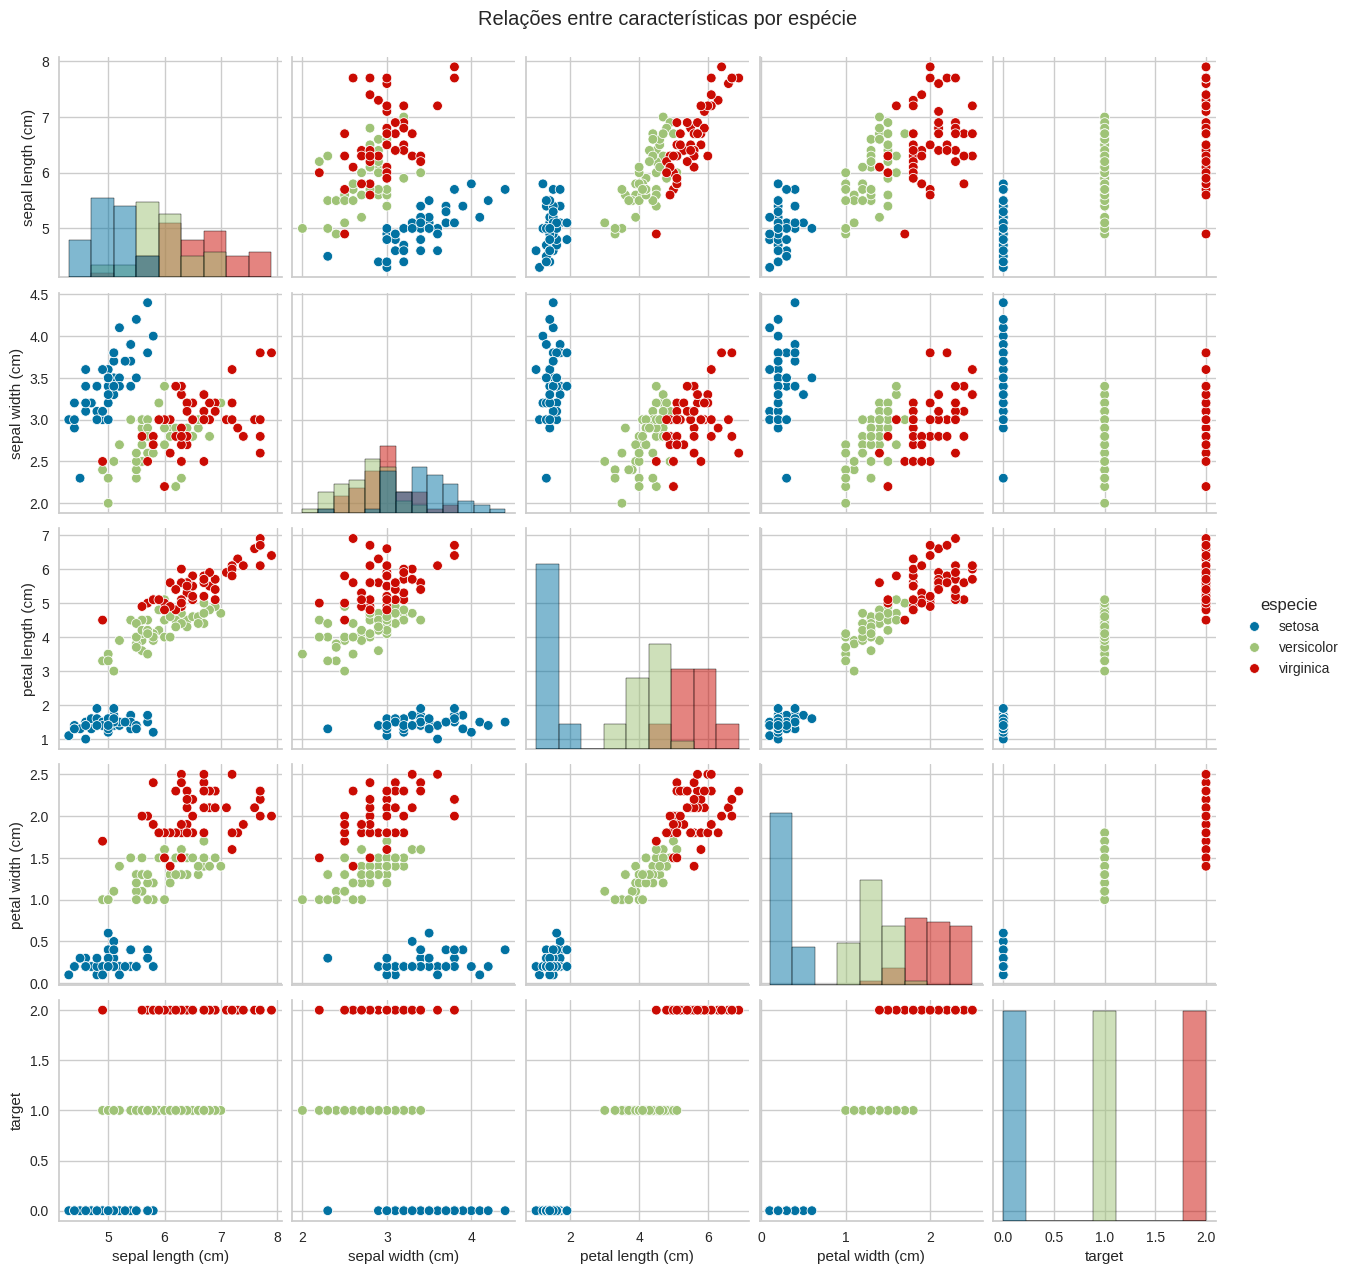

In [10]:
# 1. Pairplot dos dados
plt.figure(figsize=(12, 8))
sns.pairplot(iris_df, hue='especie', diag_kind='hist')
plt.suptitle('Relações entre características por espécie', y=1.02)
plt.show()

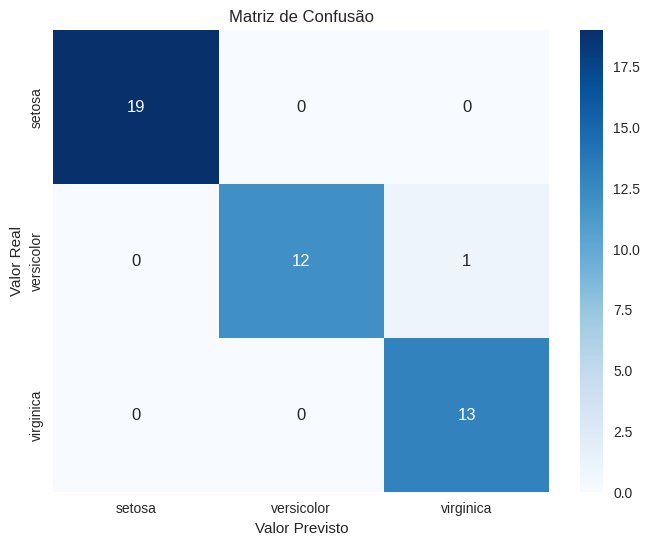

In [11]:
# 2. Matriz de Confusão
plt.figure(figsize=(8, 6))
cm = confusion_matrix(especies_teste, especies_previstas)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

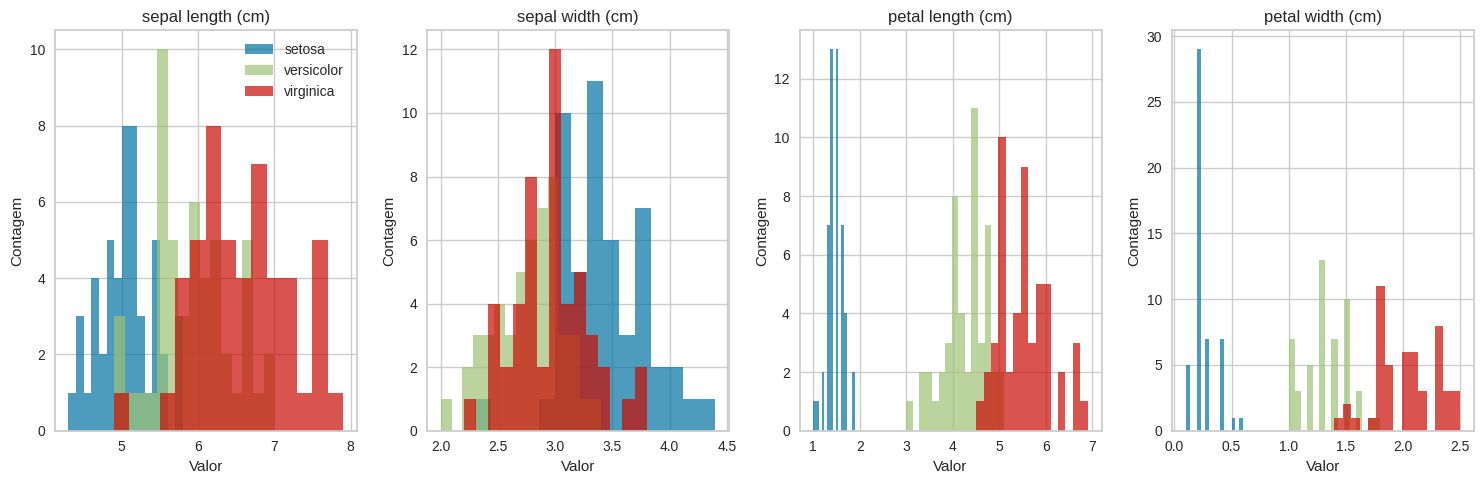

In [12]:
# 3. Distribuição das características por classe
plt.figure(figsize=(15, 5))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(1, 4, i+1)
    for target in range(3):
        plt.hist(caracteristicas[especies == target][:, i],
                label=iris.target_names[target],
                alpha=0.7, bins=15)
    plt.title(feature)
    plt.xlabel('Valor')
    plt.ylabel('Contagem')
    if i == 0:
        plt.legend()
plt.tight_layout()
plt.show()

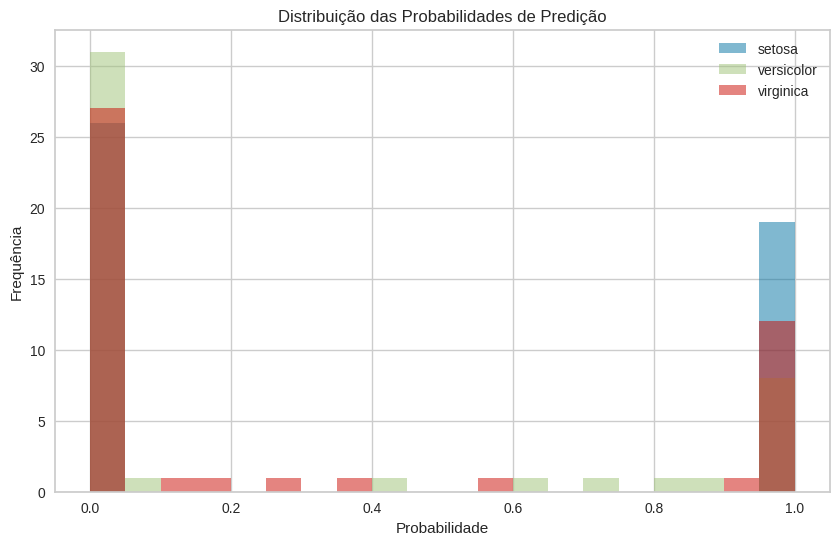

In [14]:
# 4. Probabilidades de predição
probs = nb_model.predict_proba(caract_teste)
plt.figure(figsize=(10, 6))
for i, classe in enumerate(iris.target_names):
    plt.hist(probs[:, i], alpha=0.5, label=classe, bins=20)
plt.title('Distribuição das Probabilidades de Predição')
plt.xlabel('Probabilidade')
plt.ylabel('Frequência')
plt.legend()
plt.show()

In [17]:
print("\n=== Relatório de Classificação Detalhado ===")
print(classification_report(especies_teste, especies_previstas,
                          target_names=iris.target_names))

relatorio = classification_report(especies_teste, especies_previstas,
                                target_names=iris.target_names,
                                output_dict=True)

# DataFrame com o relatório para melhor visualização
relatorio_df = pd.DataFrame(relatorio).transpose()
print("\n=== Relatório em formato de tabela ===")
print(relatorio_df)


=== Relatório de Classificação Detalhado ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


=== Relatório em formato de tabela ===
              precision    recall  f1-score    support
setosa         1.000000  1.000000  1.000000  19.000000
versicolor     1.000000  0.923077  0.960000  13.000000
virginica      0.928571  1.000000  0.962963  13.000000
accuracy       0.977778  0.977778  0.977778   0.977778
macro avg      0.976190  0.974359  0.974321  45.000000
weighted avg   0.979365  0.977778  0.977745  45.000000


## Setosa (Íris Setosa):
* Desempenho 100% em todas as métricas
* Precision: 1.00 - Todas as flores classificadas como setosa eram realmente setosa
* Recall: 1.00 - Todas as flores setosa foram corretamente identificadas

## Versicolor (Íris Versicolor):
* Precision: 1.00 - Todas as flores classificadas como versicolor eram realmente versicolor
* Recall: 0.92 - 92% das flores versicolor foram corretamente identificadas
Uma pequena confusão na classificação (provavelmente 1 flor em 13 foi classificada incorretamente)

## Virginica (Íris Virginica):
* Precision: 0.93 - 93% das flores classificadas como virginica eram realmente virginica
* Recall: 1.00 - Todas as flores virginica foram corretamente identificadas

# Desempenho Geral:
* Acurácia global: 97.78% (0.978)
* equilíbrio entre as classes
* Média ponderada de precision e recall próxima a 98%